# Lab 1 - Biomecânica da propulsão em cadeira de Rodas - Leonardo Afonseca

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2, "lines.markersize": 20})

In [2]:
Freq = 150

## Leitura dos dados

In [3]:
dados_cine = pd.read_excel (r'Trimmed_SUB01_c_1.xlsx',skiprows=5)

dados = pd.read_excel(r'Trimmed_SUB01_c_1_Trunk.xlsx')
Trunk = dados.drop(columns=['Frame#','Time'])

dados = pd.read_excel(r'Trimmed_SUB01_c_1_LShoulder.xlsx')
LShoulder = dados.drop(columns=['Frame#','Time'])

dados = pd.read_excel(r'Trimmed_SUB01_c_1_LElbow.xlsx')
LElbow = dados.drop(columns=['Frame#','Time'])

dados = pd.read_excel(r'Trimmed_SUB01_c_1_LWrist.xlsx')
LWrist = dados.drop(columns=['Frame#','Time'])

dados = pd.read_excel(r'Trimmed_SUB01_c_1_RShoulder.xlsx')
RShoulder = dados.drop(columns=['Frame#','Time'])

dados = pd.read_excel(r'Trimmed_SUB01_c_1_RElbow.xlsx')
RElbow = dados.drop(columns=['Frame#','Time'])

dados = pd.read_excel(r'Trimmed_SUB01_c_1_RWrist.xlsx')
RWrist = dados.drop(columns=['Frame#','Time'])


## Cálculo do movimento, velocidade e aceleração

In [4]:
RW = dados_cine[dados_cine.columns[80:83]]
RW.rename(inplace=True, columns={'Unnamed: 80':'x','Unnamed: 81':'y','Unnamed: 82':'z'})
LW = dados_cine[dados_cine.columns[83:86]]
LW.rename(inplace=True, columns={'Unnamed: 83':'x','Unnamed: 84':'y','Unnamed: 85':'z'})
R_3M = dados_cine[dados_cine.columns[41:44]]
R_3M.rename(inplace=True, columns={'Unnamed: 41':'x','Unnamed: 42':'y','Unnamed: 43':'z'})
L_3M = dados_cine[dados_cine.columns[74:77]]
L_3M.rename(inplace=True, columns={'Unnamed: 74':'x','Unnamed: 75':'y','Unnamed: 76':'z'})


R3M = R_3M - RW
L3M = L_3M - LW

C:\Users\leo_a\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
R3M_vel = np.diff(R3M,axis=0) * Freq
R3M_acel = np.diff(R3M_vel,axis=0) * Freq
L3M_vel = np.diff(L3M,axis=0) * Freq
L3M_acel = np.diff(L3M_vel,axis=0) * Freq

In [6]:
#Graph configuration
#plt.rcParams.keys()
plt.rcParams['font.size']=15 #valores
plt.rcParams['xtick.labelsize']=15 # barras
plt.rcParams['ytick.labelsize']=15 # barras
plt.rcParams['axes.titlesize']=20 #titulo
plt.rcParams['axes.labelsize']=15 #eixos

## Definição do padrão de movimento

Text(0.5, 1.0, 'Padrão SC')

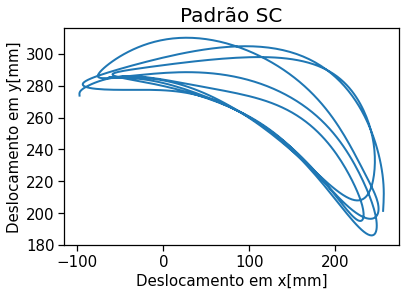

In [7]:
tempo=dados_cine[dados_cine.columns[1]]
plt.figure()
plt.plot(L3M['x'],L3M['y'])
plt.xlabel('Deslocamento em x[mm]')
plt.ylabel('Deslocamento em y[mm]')
plt.title('Padrão SC')


## Velocidade anteroposterior e vertical

Text(0.5, 1.0, 'L3M velocidade vertical')

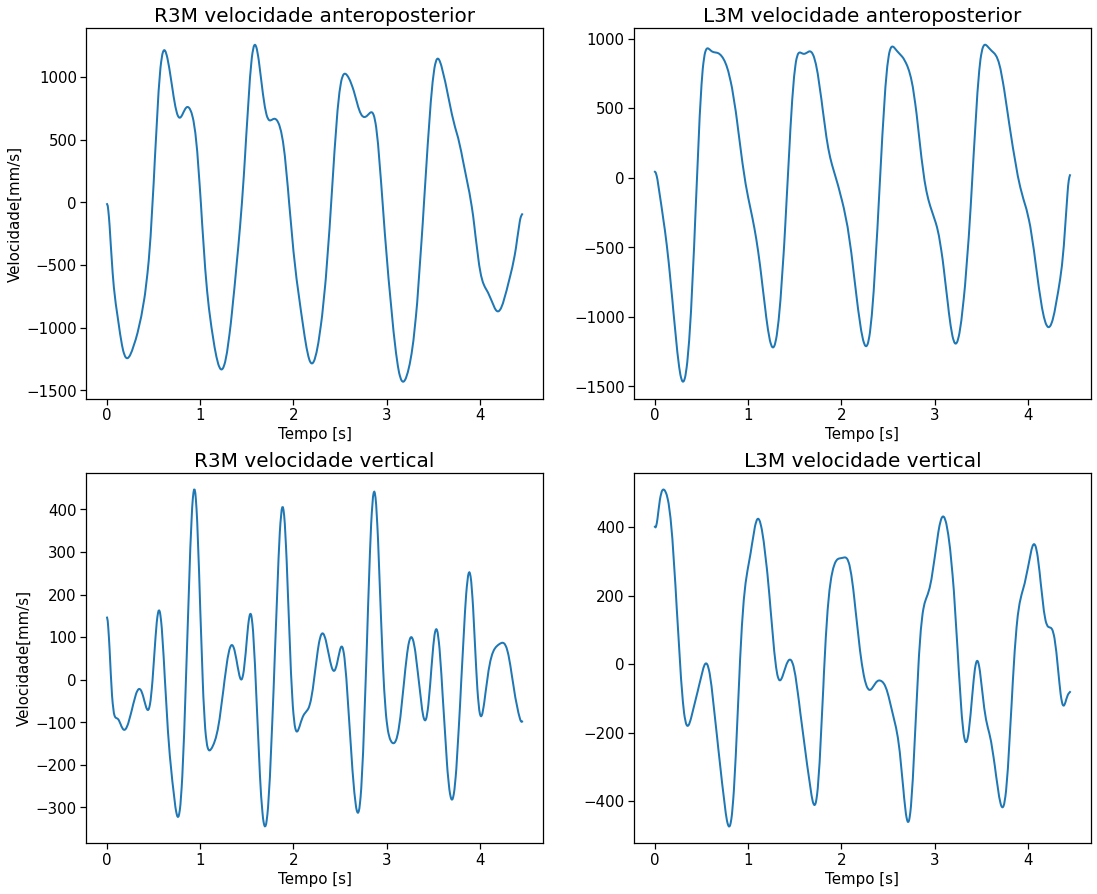

In [22]:
plt.tight_layout()
plt.subplots_adjust(top=0.90)
%matplotlib inline  
tempo=dados_cine[dados_cine.columns[1]]
fig, axes = plt.subplots(2, 2, figsize=(18,15))
axes[0][0].plot(tempo[:-1],R3M_vel[:,0])
axes[0][0].set_xlabel('Tempo [s]')
axes[0][0].set_ylabel('Velocidade[mm/s]')
axes[0][0].set_title('R3M velocidade anteroposterior')

axes[0][1].plot(tempo[:-1],L3M_vel[:,0])
axes[0][1].set_xlabel('Tempo [s]')

axes[0][1].set_title('L3M velocidade anteroposterior')

axes[1][0].plot(tempo[:-1],R3M_vel[:,1])
axes[1][0].set_xlabel('Tempo [s]')
axes[1][0].set_ylabel('Velocidade[mm/s]')
axes[1][0].set_title('R3M velocidade vertical')

axes[1][1].plot(tempo[:-1],L3M_vel[:,1])
axes[1][1].set_xlabel('Tempo [s]')

axes[1][1].set_title('L3M velocidade vertical')


## Aceleração anteroposterior e vertical

Text(0.5, 1.0, 'L3M aceleração vertical')

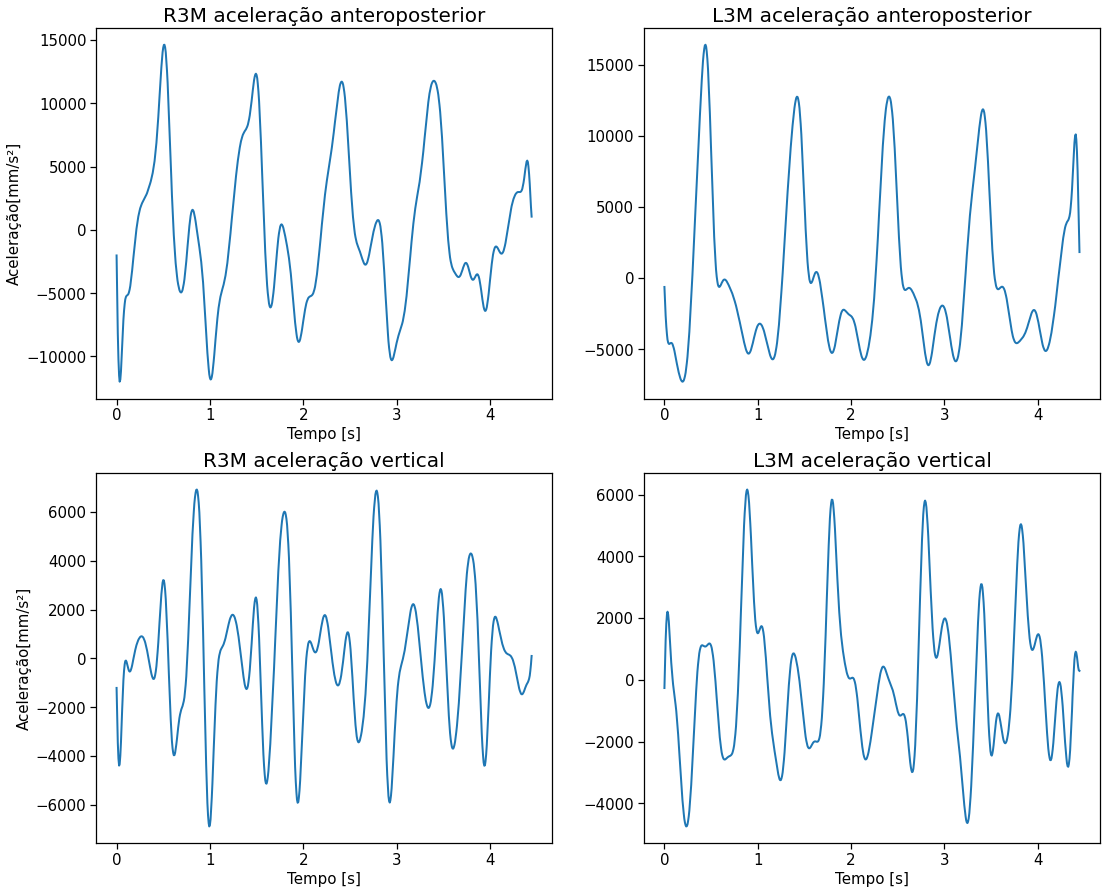

In [8]:
plt.tight_layout()
plt.subplots_adjust(top=0.90)
%matplotlib inline  
tempo=dados_cine[dados_cine.columns[1]]
fig, axes = plt.subplots(2, 2, figsize=(18,15))
axes[0][0].plot(tempo[:-2],R3M_acel[:,0])
axes[0][0].set_xlabel('Tempo [s]')
axes[0][0].set_ylabel('Aceleração[mm/s²]')
axes[0][0].set_title('R3M aceleração anteroposterior')

axes[0][1].plot(tempo[:-2],L3M_acel[:,0])
axes[0][1].set_xlabel('Tempo [s]')

axes[0][1].set_title('L3M aceleração anteroposterior')

axes[1][0].plot(tempo[:-2],R3M_acel[:,1])
axes[1][0].set_xlabel('Tempo [s]')
axes[1][0].set_ylabel('Aceleração[mm/s²]')
axes[1][0].set_title('R3M aceleração vertical')

axes[1][1].plot(tempo[:-2],L3M_acel[:,1])
axes[1][1].set_xlabel('Tempo [s]')

axes[1][1].set_title('L3M aceleração vertical')


## Encontrar os picos

In [9]:
from scipy.signal import find_peaks

### Início da fase de propulsão

In [10]:
ind_R3M_inicio, _ = find_peaks(R3M_acel[:,0], height=5000)
ind_L3M_inicio, _ = find_peaks(L3M_acel[:,0], height=10000)

### Fim da fase de propulsão

In [11]:
ind_R3M_final, _ = find_peaks(R3M_acel[:,1], height=4000)
ind_L3M_final, _ = find_peaks(L3M_acel[:,1], height=5000)

In [12]:
ind_R3M_inicio

array([ 77, 224, 362, 510, 660], dtype=int64)

In [13]:
ind_R3M_final

array([129, 270, 418, 569], dtype=int64)

In [14]:
ind_L3M_inicio

array([ 66, 213, 361, 512, 661], dtype=int64)

In [15]:
ind_L3M_final

array([133, 269, 419, 573], dtype=int64)

## Separação dos ângulos articulares

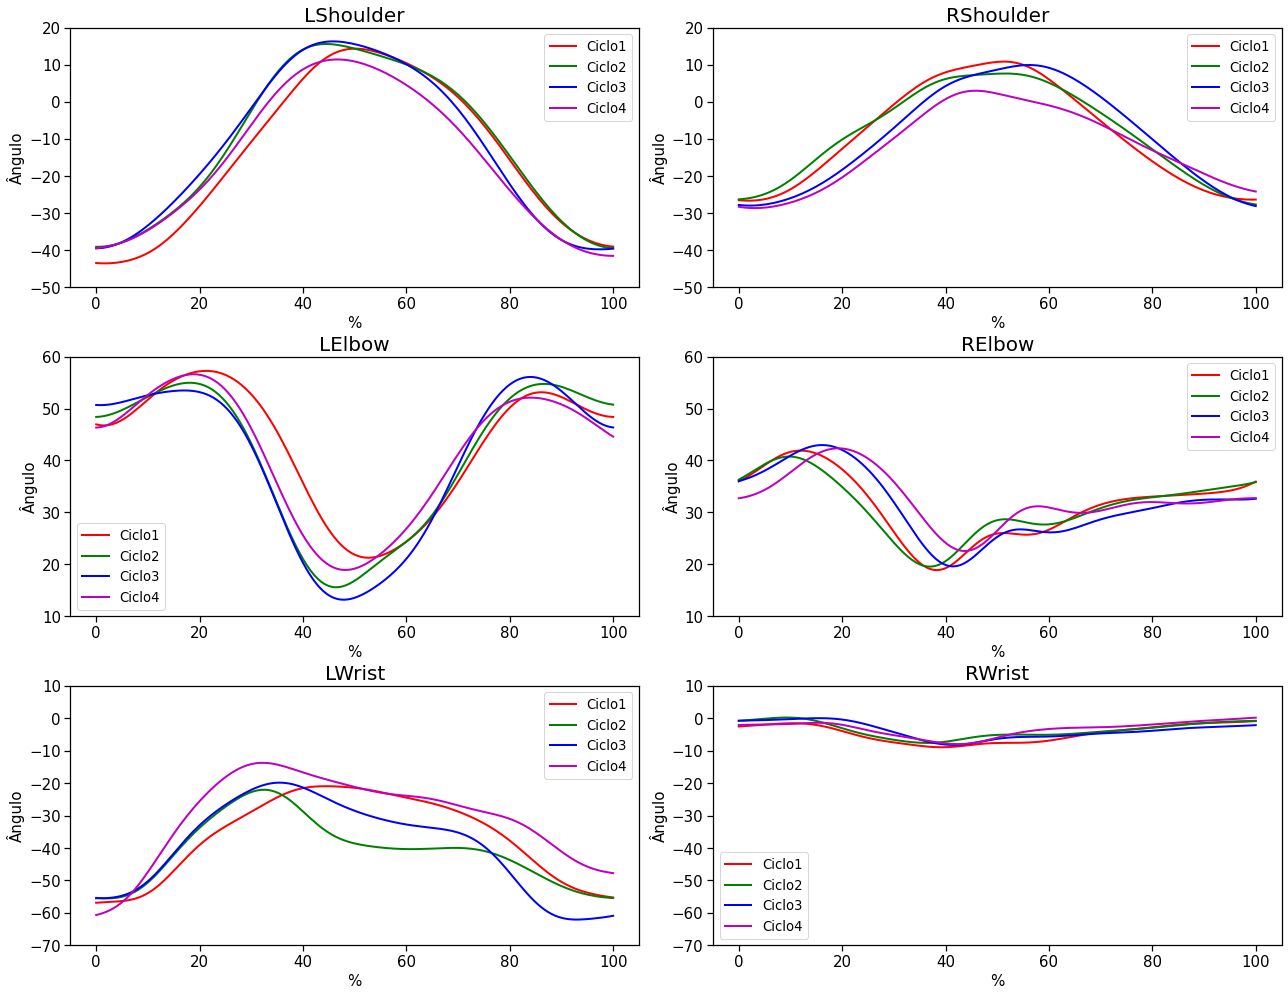

In [23]:
tempo=dados_cine[dados_cine.columns[1]]
fig, axes = plt.subplots(3, 2, figsize=(18,15))

#SHOULDER

ciclo_1=LShoulder['Z'][66:213]
ciclo_2=LShoulder['Z'][213:361]
ciclo_3=LShoulder['Z'][361:512]
ciclo_4=LShoulder['Z'][512:661]

axes[0][0].plot(np.linspace(0,100,ciclo_1.size),ciclo_1,color='r',label='Ciclo1')
axes[0][0].plot(np.linspace(0,100,ciclo_2.size),ciclo_2,color='g',label='Ciclo2')
axes[0][0].plot(np.linspace(0,100,ciclo_3.size),ciclo_3,color='b',label='Ciclo3')
axes[0][0].plot(np.linspace(0,100,ciclo_4.size),ciclo_4,color='m',label='Ciclo4')
axes[0][0].set_xlabel('%')
axes[0][0].set_ylabel('Ângulo')
axes[0][0].set_title('LShoulder')
axes[0][0].legend()
axes[0][0].set_ylim(ymin=-50,ymax=20)

ciclo_1=RShoulder['Z'][77:224]
ciclo_2=RShoulder['Z'][224:362]
ciclo_3=RShoulder['Z'][362:510]
ciclo_4=RShoulder['Z'][510:660]


axes[0][1].plot(np.linspace(0,100,ciclo_1.size),ciclo_1,color='r',label='Ciclo1')
axes[0][1].plot(np.linspace(0,100,ciclo_2.size),ciclo_2,color='g',label='Ciclo2')
axes[0][1].plot(np.linspace(0,100,ciclo_3.size),ciclo_3,color='b',label='Ciclo3')
axes[0][1].plot(np.linspace(0,100,ciclo_4.size),ciclo_4,color='m',label='Ciclo4')

axes[0][1].set_xlabel('%')
axes[0][1].set_ylabel('Ângulo')
axes[0][1].set_title('RShoulder')
axes[0][1].legend()
axes[0][1].set_ylim(ymin=-50,ymax=20)

#ELBOW

ciclo_1=LElbow['Z'][66:213]
ciclo_2=LElbow['Z'][213:361]
ciclo_3=LElbow['Z'][361:512]
ciclo_4=LElbow['Z'][512:661]

axes[1][0].plot(np.linspace(0,100,ciclo_1.size),ciclo_1,color='r',label='Ciclo1')
axes[1][0].plot(np.linspace(0,100,ciclo_2.size),ciclo_2,color='g',label='Ciclo2')
axes[1][0].plot(np.linspace(0,100,ciclo_3.size),ciclo_3,color='b',label='Ciclo3')
axes[1][0].plot(np.linspace(0,100,ciclo_4.size),ciclo_4,color='m',label='Ciclo4')
axes[1][0].set_xlabel('%')
axes[1][0].set_ylabel('Ângulo')
axes[1][0].set_title('LElbow')
axes[1][0].legend()
axes[1][0].set_ylim(ymin=10,ymax=60)

ciclo_1=RElbow['Z'][77:224]
ciclo_2=RElbow['Z'][224:362]
ciclo_3=RElbow['Z'][362:510]
ciclo_4=RElbow['Z'][510:660]


axes[1][1].plot(np.linspace(0,100,ciclo_1.size),ciclo_1,color='r',label='Ciclo1')
axes[1][1].plot(np.linspace(0,100,ciclo_2.size),ciclo_2,color='g',label='Ciclo2')
axes[1][1].plot(np.linspace(0,100,ciclo_3.size),ciclo_3,color='b',label='Ciclo3')
axes[1][1].plot(np.linspace(0,100,ciclo_4.size),ciclo_4,color='m',label='Ciclo4')

axes[1][1].set_xlabel('%')
axes[1][1].set_ylabel('Ângulo')
axes[1][1].set_title('RElbow')
axes[1][1].legend()
axes[1][1].set_ylim(ymin=10,ymax=60)

#WRIST

ciclo_1=LWrist['Z'][66:213]
ciclo_2=LWrist['Z'][213:361]
ciclo_3=LWrist['Z'][361:512]
ciclo_4=LWrist['Z'][512:661]

axes[2][0].plot(np.linspace(0,100,ciclo_1.size),ciclo_1,color='r',label='Ciclo1')
axes[2][0].plot(np.linspace(0,100,ciclo_2.size),ciclo_2,color='g',label='Ciclo2')
axes[2][0].plot(np.linspace(0,100,ciclo_3.size),ciclo_3,color='b',label='Ciclo3')
axes[2][0].plot(np.linspace(0,100,ciclo_4.size),ciclo_4,color='m',label='Ciclo4')
axes[2][0].set_xlabel('%')
axes[2][0].set_ylabel('Ângulo')
axes[2][0].set_title('LWrist')
axes[2][0].legend()
axes[2][0].set_ylim(ymin=-70,ymax=10)

ciclo_1=RWrist['Z'][77:224]
ciclo_2=RWrist['Z'][224:362]
ciclo_3=RWrist['Z'][362:510]
ciclo_4=RWrist['Z'][510:660]


axes[2][1].plot(np.linspace(0,100,ciclo_1.size),ciclo_1,color='r',label='Ciclo1')
axes[2][1].plot(np.linspace(0,100,ciclo_2.size),ciclo_2,color='g',label='Ciclo2')
axes[2][1].plot(np.linspace(0,100,ciclo_3.size),ciclo_3,color='b',label='Ciclo3')
axes[2][1].plot(np.linspace(0,100,ciclo_4.size),ciclo_4,color='m',label='Ciclo4')

axes[2][1].set_xlabel('%')
axes[2][1].set_ylabel('Ângulo')
axes[2][1].set_title('RWrist')
axes[2][1].legend()
axes[2][1].set_ylim(ymin=-70,ymax=10)


plt.tight_layout()
plt.subplots_adjust(top=0.90)

## Cálculo de média e desvio padrão - Propulsão e Recuperação

In [17]:
Propulsão_ciclo_1_direito = (129-77)/Freq
Propulsão_ciclo_2_direito = (270-224)/Freq
Propulsão_ciclo_3_direito = (418-362)/Freq
Propulsão_ciclo_4_direito = (569-510)/Freq
Propulsão_direito=[Propulsão_ciclo_1_direito,Propulsão_ciclo_2_direito,Propulsão_ciclo_3_direito,Propulsão_ciclo_4_direito]


Recuperação_ciclo_1_direito = (224-129)/Freq
Recuperação_ciclo_2_direito = (362-270)/Freq
Recuperação_ciclo_3_direito = (510-418)/Freq
Recuperação_ciclo_4_direito = (660-569)/Freq
Recuperação_direito=[Recuperação_ciclo_1_direito,Recuperação_ciclo_2_direito,Recuperação_ciclo_3_direito,Recuperação_ciclo_4_direito]


Propulsão_ciclo_1_esquerdo = (133-66)/Freq
Propulsão_ciclo_2_esquerdo = (269-213)/Freq
Propulsão_ciclo_3_esquerdo = (419-361)/Freq
Propulsão_ciclo_4_esquerdo = (573-512)/Freq
Propulsão_esquerdo=[Propulsão_ciclo_1_esquerdo,Propulsão_ciclo_2_esquerdo,Propulsão_ciclo_3_esquerdo,Propulsão_ciclo_4_esquerdo]

Recuperação_ciclo_1_esquerdo = (213-133)/Freq
Recuperação_ciclo_2_esquerdo = (361-269)/Freq
Recuperação_ciclo_3_esquerdo = (512-419)/Freq
Recuperação_ciclo_4_esquerdo = (661-573)/Freq
Recuperação_esquerdo=[Recuperação_ciclo_1_esquerdo,Recuperação_ciclo_2_esquerdo,Recuperação_ciclo_3_esquerdo,Recuperação_ciclo_4_esquerdo]

In [18]:
print('Média de tempo da fase de propulsão do lado direito é {0:0.2f} +- {1:0.2f}'.format(np.mean(Propulsão_direito),np.std(Propulsão_direito)))
print('Média de tempo da fase de recuperação do lado direito é {0:0.2f} +- {1:0.2f}'.format(np.mean(Recuperação_direito),np.std(Recuperação_direito)))
print('Média de tempo da fase de propulsão do lado esquerdo é {0:0.2f} +- {1:0.2f}'.format(np.mean(Propulsão_esquerdo),np.std(Propulsão_esquerdo)))
print('Média de tempo da fase de recuperação do lado esquerdo é {0:0.2f} +- {1:0.2f}'.format(np.mean(Recuperação_esquerdo),np.std(Recuperação_esquerdo)))

Média de tempo da fase de propulsão do lado direito é 0.35 +- 0.03
Média de tempo da fase de recuperação do lado direito é 0.62 +- 0.01
Média de tempo da fase de propulsão do lado esquerdo é 0.40 +- 0.03
Média de tempo da fase de recuperação do lado esquerdo é 0.59 +- 0.03
